# What is Intent Classification

Intents are general traits that map the user’s message to the corresponding bot action (prediction workflow). For example, the phrase “What is the weather today?” will map to ‘weather_inquiry’ intent by its entire wording, and not some particular part.

A restaurant_search can be expressed in many different ways:-

I'm hungry. Show me good pizza spots. I want to take my boyfriend out for sushi

This can also be request_booking




In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv
/kaggle/input/atis-airlinetravelinformationsystem/atis_intents.csv
/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_test.csv
/kaggle/input/dataset-5/train.csv
/kaggle/input/dataset-5/test.csv
/kaggle/input/dataset-5/dataset of intent.csv
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/tokenizer
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/meta.json
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/vocab/vectors
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/vocab/lexemes.bin
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/vocab/strings.json
/kaggle/input/spacyen-vectors-web-lg/spacy-en_vectors_web_lg/en_vectors_web_lg/vocab/keys
/kaggle/input/spacyen-vectors-web-lg/en_vectors_web_lg/tokenizer
/kaggle/input/spacyen-vectors-web-lg/en_vectors_web_lg

## Load Data from ATIS Dataset


In [36]:
import spacy
import csv

def read_data(path):
    with open(path, 'r') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        labels = []
        sentences = []
        for row in readCSV:
            label = row[0]
            sentence = row[1]
            labels.append(label)
            sentences.append(sentence)
    return sentences, labels

# Loading Test Data

sentences_test,labels_test = read_data('/kaggle/input/dataset-5/test.csv')
print(sentences_test[:3],'\n')
print(labels_test[:3])

# Loading Training Data

sentences_train,labels_train = read_data('/kaggle/input/dataset-5/train.csv')


['question', 'Can you tell me about Build proccess security hardening ?', 'How to defend Block common password and weak passphrases ?'] 

['classs', 'Description', 'Solution']


## Spacy Setup

In [37]:
!python -m spacy download en_vectors_web_lg
!python -m spacy link en_vectors_web_lg en_vectors_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')

✘ Link 'en_vectors_web_lg' already exists
To overwrite an existing link, use the --force flag



## Loading spaCy model

In [38]:


import spacy
import numpy as np

# Load the spacy model: nlp
nlp = spacy.load('en_vectors_web_lg')




In [39]:
# Calculate the dimensionality of nlp
embedding_dim = nlp.vocab.vectors_length

print(embedding_dim)


300


# Encoding Sentences Using spaCy NLP Model


In [40]:

def encode_sentences(sentences):
    # Calculate number of sentences
    n_sentences = len(sentences)

    print('Length :-',n_sentences)

    X = np.zeros((n_sentences, embedding_dim))
    #y = np.zeros((n_sentences, embedding_dim))

    # Iterate over the sentences
    for idx, sentence in enumerate(sentences):
        # Pass each sentence to the nlp object to create a document
        doc = nlp(sentence)
        # Save the document's .vector attribute to the corresponding row in     
        # X
        X[idx, :] = doc.vector
    return X

train_X = encode_sentences(sentences_train)
test_X = encode_sentences(sentences_test)


Length :- 4782
Length :- 1198


# Label Encoding

In [41]:
def label_encoding(labels):
    # Calculate the length of labels

    n_labels = len(labels)
    print('Number of labels :-',n_labels)


    # import labelencoder
    from sklearn.preprocessing import LabelEncoder
    # instantiate labelencoder object
    le = LabelEncoder()
    y =le.fit_transform(labels)
    print(y[:100])
    print('Length of y :- ',y.shape)
    return y

train_y = label_encoding(labels_train)
test_y = label_encoding(labels_test)


Number of labels :- 4782
[3 0 0 1 0 2 1 1 1 2 2 0 1 1 2 2 0 1 2 0 1 0 2 2 2 2 1 1 1 2 0 1 1 1 2 0 0
 1 2 1 2 2 2 1 2 2 2 2 1 1 1 0 1 0 1 2 2 1 2 2 0 1 1 0 0 1 1 1 4 2 4 1 1 2
 2 1 2 2 1 0 2 2 2 1 0 1 1 1 1 0 1 1 1 0 2 2 0 2 2 1]
Length of y :-  (4782,)
Number of labels :- 1198
[3 1 2 2 2 0 0 1 1 2 0 2 2 2 1 2 1 2 1 1 1 1 0 0 1 2 2 2 0 2 2 2 1 1 2 1 1
 2 2 1 0 2 4 1 1 2 2 4 2 1 1 0 1 2 1 0 2 0 2 1 1 1 1 1 4 0 1 4 4 2 2 1 0 1
 2 2 0 1 1 0 2 1 2 1 2 2 2 0 0 1 4 1 1 2 2 1 4 1 1 0]
Length of y :-  (1198,)


# EDA

In [52]:
df1 = pd.read_csv('/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv', delimiter=',')
df1.dataframeName = 'atis_intents_train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4833 rows and 2 columns


In [53]:
df1.sample(10)

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
3884,atis_airfare,lowest fare from san francisco to los angeles
4598,atis_flight,show flights on us air from pittsburgh to oak...
3369,atis_flight,show me the flights from washington dc to san...
559,atis_flight,what are the flights from tacoma to san jose ...
489,atis_airfare,what's the lowest round trip fare from dallas...
4764,atis_flight,i would like to book an early morning flight ...
4215,atis_airline,show me the airlines that fly from san franci...
3792,atis_ground_service,what ground transportation is available in ba...
937,atis_flight,show me the flights from columbus to charlotte
1068,atis_flight,flights from la guardia or jfk to cleveland


In [54]:
df1.describe()

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
count,4833,4833
unique,8,4498
top,atis_flight,what is fare code h
freq,3665,8


Text(0, 0.5, 'Frequency')

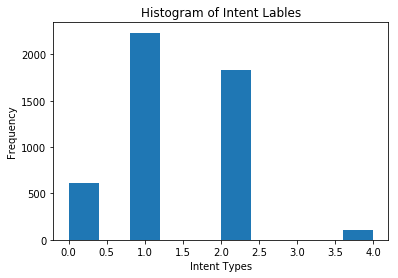

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(train_y)

# Add labels
plt.title('Histogram of Intent Lables')
plt.xlabel('Intent Types')
plt.ylabel('Frequency')
#df1['atis_flight'].hist()

## Intent classification with SVM | Training Step

In [46]:
# Import SVC
from sklearn.svm import SVC
# X_train and y_train was given.
def svc_training(X,y):
    # Create a support vector classifier
    clf = SVC(C=1)

    # Fit the classifier using the training data
    clf.fit(X, y)
    return clf

model = svc_training(train_X,train_y)


In [49]:
#Validation Step

print('Dataset Used - Dataset_2')

def svc_validation(model,X,y):
    # Predict the labels of the test set
    y_pred = model.predict(X)

    # Count the number of correct predictions
    n_correct = 0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            n_correct += 1

    print("Predicted {0} correctly out of {1} training examples".format(n_correct, len(y)))


svc_validation(model,train_X,train_y)
svc_validation(model,test_X,test_y)


Dataset Used - Dataset_2
Predicted 4780 correctly out of 4782 training examples
Predicted 1196 correctly out of 1198 training examples


In [50]:
from sklearn.metrics import classification_report
y_true, y_pred = test_y, model.predict(test_X)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      1.00      1.00       559
           2       1.00      1.00      1.00       458
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        27

    accuracy                           1.00      1198
   macro avg       0.80      0.80      0.80      1198
weighted avg       1.00      1.00      1.00      1198



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

This is an imbalanced dataset with some of the classes having small number of samples. The resulting poor classification accuracy can be seen in the results.

## Note
Please share, upvote and comment to help me create and share more content for the community.
Thank you all.